# Prediction of Formation Energies and Bandgaps in Transparent Semiconductors<br>
### Mayank Agrawal


## Background
Machine learning theory has impacted a large variety of areas including computer gaming, fraud detection and bioinformatics<sup>1</sup>. Materials research is now a key thrust area for these data analysis techniques. Traditionally in material science, the role of computational approaches has been restricted in its predictive nature owing to the heavy computational requirements and associated costs (e.g. hundreds of CPU hours, expensive maintenance of hardware clusters) of tools such as molecular dynamics, density functional theory (DFT) calculations and ab-initio material simulations. More recently, promising work on prediction of phase diagrams,<sup>2</sup> crystal structures,<sup>3,4</sup> and materials properties,<sup>5,6</sup> and rapid data analysis of high‐throughput experiments,<sup>7</sup> has been documented in the literature. Further progress is expected to strengthen the role of machine learning accelerated materials design, research and prediction. Smarter search techniques using DFT generated datasets as the foundation for machine learning algorithms could hold potential to revolutionize the field and accelerate material discovery and design<sup>8</sup>. Thus, the use of data science tools can enable an efficient prediction of material structures with desired properties.<br><br>
In this course project, we will apply machine learning tools to a DFT dataset of material structures with the aim of predicting properties of interest viz. formation energies and electronic bandgaps for transparent conducting materials. We will use both supervised and unsupervised learning paradigms of machine learning to derive correlations between structural information and material properties which could help accelerate the search and design of efficient transparent conductors. The motivation for this project stems from the fact that global climate challenge has brought a focus on generating energy from renewable and sustainable resources including the most abundant energy resource available to us in the form of the Sun. The conversion of solar energy to electric energy is hinged upon the performance of solar photovoltaic materials. Transparent conducting materials are an important class of materials used in the manufacture of these solar photovoltaics<sup>9</sup>. In addition, modern optoelectronic devices make use of this special class of materials. As the name suggests, transparent conductors are electrically conducting with low absorption of the visible spectra of light (see Figure 1(b) ). The absorptivity is controlled by the band gap between the conduction and the valence band. A larger electronic band-gap promotes the transparent property, but at the same time competes with the high electrical conductivity property<sup>10</sup>. The dataset under consideration comprises of oxides of Aluminum, Gallium and Indium, which are expected to lead the front in search for efficient transparent conductors owing to the combination of both large bandgap energies, which leads to optical transparency over the visible range, and low electrical resistance. These alloys are described by the formula $(Al_{x}Ga_{y}In_{z})_{2N}O_{3N}$; where x, y, and z can vary but are limited by the constraint x+y+z = 1. The total number of atoms in the unit cell, $N_{total}$=$2N$+$3N$ (where N is an integer), is typically between 5 and 100. However, the main limitation in the design of compounds is that identification and discovery of novel materials for targeted applications requires an examination of enormous compositional and configurational degrees of freedom (i.e., many combinations of x, y, and z). To avoid costly and inefficient trial-and-error of synthetic routes, computational data-driven methods can be used to guide the discovery of potentially more efficient materials to aid in the development of advanced (or totally new) technologies. In computational material science, the standard tool for computing these properties is the quantum-mechanical method known as density-functional theory (DFT) which is computationally expensive. As a result, potential $(Al_{x}Ga_{y}In_{z})_{2N}O_{3N}$ materials remain relatively unexplored. Data-driven models offer an alternative approach to efficiently search for new possible compounds in targeted applications but at a significantly reduced computational cost.

<figure>
    <center>
        <img src="band_gap.png" width="900">
    </center>
    <figcaption>Figure 1<sup>9</sup>. (a) A simplified Energy Bandgap in semiconductors is shown as energy difference Eg between conduction and valence band. (b) The Shockley–Queisser limit gives the maximum possible efficiency of a simple solar cell under sunlight, as a function of the semiconductor band gap. If the band gap is too high, most of the visible spectra cannot be absorbed; if it is too low, then photons have much more energy than necessary to excite electrons across the band gap, and the rest is wasted. </figcaption>

</figure>

## Dataset Description and Project Goals
The Transparent Conductor Database contains raw data for materials with the information on their space group, total number of constituent atoms, lattice vectors and angles. Additionally, atomic structure files with the coordinates of all the atoms in each structure are provided in hierarchically arranged directories. Furthermore, formation energies and electronic bandgaps are provided for ~80% of the materials. Raw data was manipulated to csv files in the folder 'train' and 'test' respectively. All the data can be downloaded from the kaggle website link 'https://www.kaggle.com/c/nomad2018-predict-transparent-conductors/data'.

### How does the working data look like?
index: id = id of the crystal structure that ranges from 1 to 2400 for training dataset and 1 to 600 for test dataset.<br><br>

<font color="red">
    0: spacegroup = spacegroup of the crystal structure
</font>

1: N_total = number of total atoms in the unit cell

2: x_Al = percent_atom_al

3: x_Ga = percent_atom_ga

4: x_In = percent_atom_in

5: a = lattice_vector_1_ang

6: b = lattice_vector_2_ang

7: c = lattice_vector_3_ang

8: alpha = lattice_angle_alpha_degree

9: beta = lattice_angle_beta_degree

10: gamma = lattice_angle_gamma_degree <br> <br>

<font color="blue"> 11: del_Hf = formation_energy_ev_natom (available only for training data) <br><br>

12: bandgap = bandgap_energy_ev (available only for training data) </font>


### Project Goals

#### Goal 1: 
Feature selection for machine learning algorithms. We are using structural parameters and atomic positions as features. <br> Columns 1-10 serve as the foundation for features for machine learning algorithms in this project. 

#### Goal 2: 
Using the selected features (from Goal 1) we used classification algorithm to predict spacegroups. Note that del_Hf and bandgap are excluded from the dataset in this Goal. The purpose of this aspect of the project is to validate feature choices as well as implement classification algorithms learnt during the course.
<br> Out of these 14 columns (including index), <font color="red">column "0:spacegroup" is used as label in classiciation.</font>

#### Goal 3: 
Using the features from Goal 1 and varied regression strategies, we are predicting formation energies and bandgaps for transparent conductors. Additionally, we will analyse the performance of these implemented learners.
<br><font color="blue">Columns "11: del_Hf" and "12: bandgap" are used as target values for regression.</font>

In [1]:
# Import Packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   #Need seaborn for heatmap
from sklearn.metrics import confusion_matrix

from functions_library import plot_confusion_matrix, test_classifier_total, plot_grid_cv_scores, performance_metrics

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

### Import training and test data into pandas dataframes

In [2]:
column_names=['spacegroup','N_total','x_Al','x_Ga','x_In','a','b','c','alpha', 'beta','gamma', 'del_Hf', 'bandgap']
df_train = pd.read_csv('./train.csv', header=0, index_col = 0, names = column_names)
df_test = pd.read_csv('./test.csv', header=0, index_col = 0, names = column_names[0:11])

The training dataset has the dimensions of 2400x13 with known values of del_Hf and bandgaps while the test dataset has the dimensions of 600x11 with unknown values of del_Hf and bandgaps.

##### Overall dataset statistical decription 

In [3]:
df_train.describe()

spacegroup      N_total         x_Al         x_Ga         x_In  \
count  2400.000000  2400.000000  2400.000000  2400.000000  2400.000000   
mean    141.517917    61.679167     0.385439     0.308601     0.305958   
std      84.715548    22.598337     0.265566     0.233717     0.263198   
min      12.000000    10.000000     0.000000     0.000000     0.000000   
25%      33.000000    40.000000     0.166700     0.093800     0.062500   
50%     194.000000    80.000000     0.375000     0.281200     0.250000   
75%     206.000000    80.000000     0.583300     0.468800     0.468800   
max     227.000000    80.000000     1.000000     1.000000     1.000000   

                 a            b            c        alpha         beta  \
count  2400.000000  2400.000000  2400.000000  2400.000000  2400.000000   
mean     10.030005     7.086977    12.593288    90.243666    92.398971   
std       5.645457     1.890330     5.450746     1.333655     5.299734   
min       3.037000     2.942300     5.672500    82.744100    81.641300   
25%       6.141100     5.833625     9.298000    89.999700    90.000900   
50%       9.537450     6.382950    10.125000    90.001700    90.003550   
75%      10.292100     9.093450    14.372050    90.006200    90.014400   
max      24.913400    10.290300    25.346000   101.229800   106.168200   

             gamma       del_Hf      bandgap  
count  2400.000000  2400.000000  2400.000000  
mean     94.787600     0.187614     2.077205  
std      25.868516     0.104100     1.006845  
min      29.727400     0.000000     0.000100  
25%      89.998700     0.105600     1.278500  
50%      90.000400     0.181800     1.907850  
75%     119.998325     0.256275     2.761950  
max     120.053500     0.657200     5.286100

## Step 1: Gaining insights into data

##### Is there correlation between bandgap and del_Hf? 
If a strong correlation exists between these two quanitites, then we can save on computation time by predicting one of these.

The correlation b/w bandgap and formation energy is:-0.4542458663649035


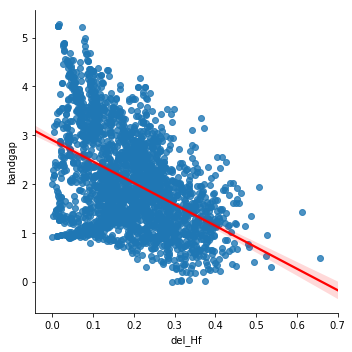

In [4]:
bghf = sns.lmplot( x="del_Hf", y = "bandgap", data = df_train, fit_reg = True, line_kws={'color': 'red'})
print("The correlation b/w bandgap and formation energy is:{}".format(df_train['bandgap'].corr(df_train['del_Hf'])) )

Unfortunately, these two quanitites are at best weakly correlated.

#### What is the distribution of the transparent conductor spacegroups in the dataset?

In [5]:
spacegroups = df_train.spacegroup.unique()
spacegroups.sort()
n_spacegroups = len(spacegroups)

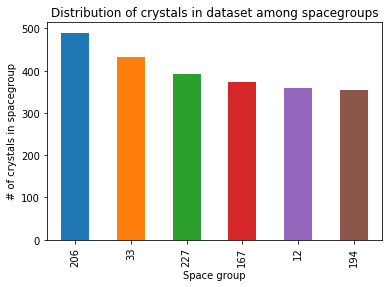

In [6]:
df_train['spacegroup'].value_counts(normalize=False).plot.bar()
plt.ylabel('# of crystals in spacegroup')
plt.xlabel('Space group')
plt.title("Distribution of crystals in dataset among spacegroups")
plt.show()

The whole dataset consists of 6 types of spacegroups, the number of structures corresponding to each space groups are shown in the graph above. 

#### Lets look at the distribution of spacegroups with final quanitites of interest: formation energy and bandgaps.

We are using plotly for interactive plots. Each plot displays the statistical parameters within each group upon mouseover.

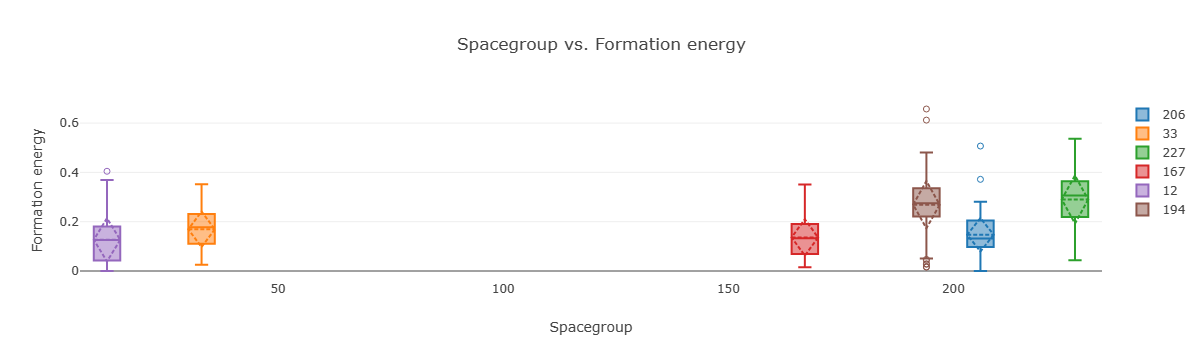

In [7]:
data = []
for number_of_total_atoms in df_train['spacegroup'].value_counts().index.tolist():
    y0 = df_train[df_train['spacegroup']==number_of_total_atoms]['del_Hf'].values
    data.append(go.Box(y=y0, name=str(number_of_total_atoms), boxpoints = 'suspectedoutliers',boxmean='sd'))
    
    layout = go.Layout(
        title = "Spacegroup vs. Formation energy",
        yaxis=dict( title = 'Formation energy'),
        xaxis=dict( title = 'Spacegroup'))
    
iplot(go.Figure(data=data,layout=layout))

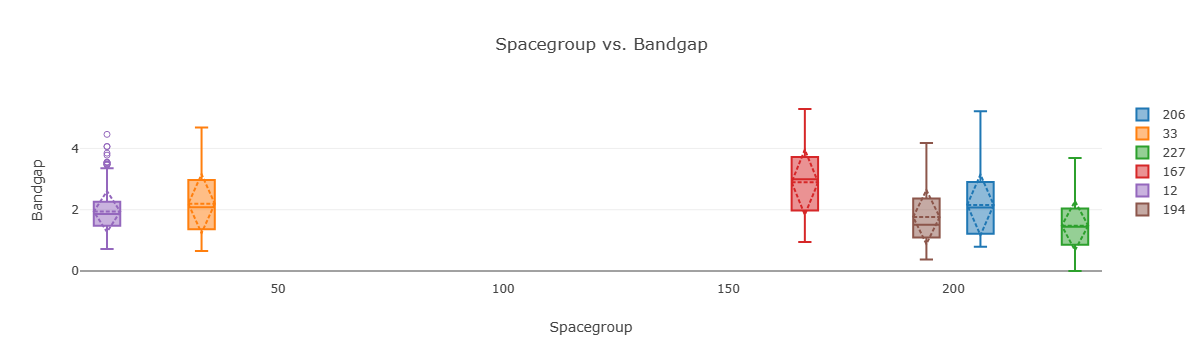

In [8]:
data = []
for number_of_total_atoms in df_train['spacegroup'].value_counts().index.tolist():
    y0 = df_train[df_train['spacegroup']==number_of_total_atoms]['bandgap'].values
    data.append(go.Box(y=y0, name=str(number_of_total_atoms), boxpoints = 'suspectedoutliers',boxmean='sd'))
    
    layout = go.Layout(
        title = "Spacegroup vs. Bandgap",
        yaxis=dict( title = 'Bandgap'),
        xaxis=dict( title = 'Spacegroup'))
    
iplot(go.Figure(data=data,layout=layout))

Spacegroup 12 shows many statistical outliers for bandgaps. This is a point to keep in mind during regression.

#### Correlations in the training dataset

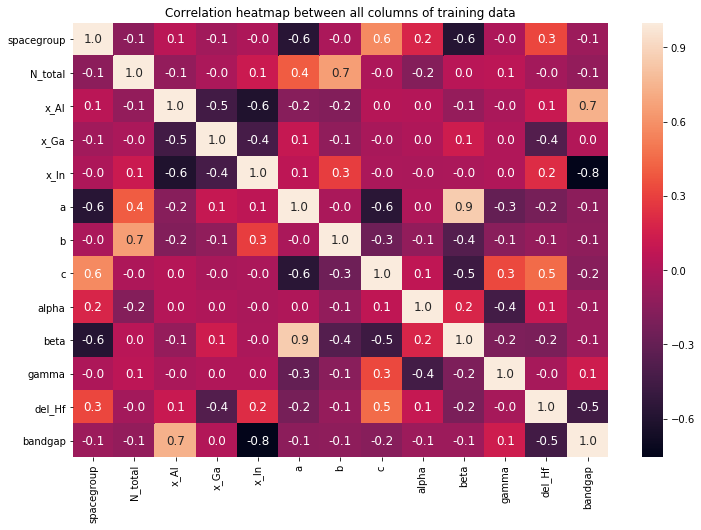

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_train.corr() ,annot=True,fmt=".1f",ax=ax,annot_kws={"size": 12}) 
ax.set_title("Correlation heatmap between all columns of training data")
plt.show()

Heatmap gives an insight into the correlations among all columns. Bandgap shows strong correlation with proportion of Indium (-0.8) and Aluminium (0.7). del_Hf does not have equally strong corelations with any of the columns.

## Step 2: Classification of Spacegroups

In order to verify that the given structural features in the dataset can correctly define the structure, we are using unit cell lattice parameters as the features to classify the spacegroup of the structures. Because spacegroup is a unique property of the crystal that is calculated using unit cell parameters, a correct prediction of this property will give us confidence in the given structural features of the datasets.<br> 


In [10]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

#Scaling using min max via inbuilt function
x = df_train.loc[:,['a', 'b', 'c', 'alpha', 'beta', 'gamma', 'N_total']].values
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(x)
y_train = df_train.loc[:,['spacegroup']].values.ravel()
df_lattice = pd.DataFrame(X_train)
df_lattice.columns=['a', 'b', 'c', 'alpha', 'beta', 'gamma', 'N_total']

#### Scree plots for LDA and PCA algorithms for dimensionality reduction
At first, LDA and PCA algorithms are implemented to see the number of components required to capture the 95% variance of the data. Following the dimensionality reduction comparison, several classification algorithms are studied and compared to classify the spacegroups for training and test datasets.

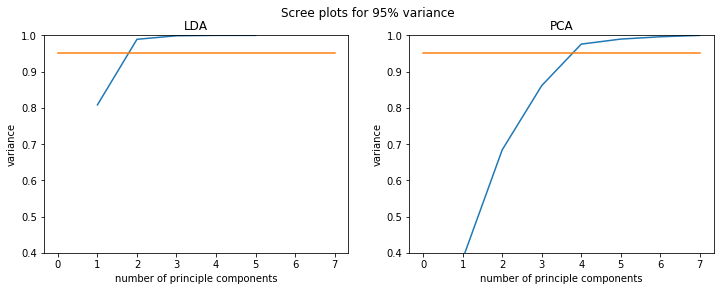

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

conductors_lda = LinearDiscriminantAnalysis(n_components=7)
LDA_conductors = conductors_lda.fit_transform(X_train, df_train.loc[:,['spacegroup']].values.ravel())

conductors_pca = PCA(n_components=7)
X_PCA = conductors_pca.fit_transform(X_train) 

fig, axes = plt.subplots(1,2,figsize=(12,4))
ev_pca = conductors_pca.explained_variance_ratio_
ev_lda = conductors_lda.explained_variance_ratio_

axes[0].plot(range(1, len(ev_lda)+1), np.cumsum(ev_lda))
axes[0].plot([0,7],[0.95,0.95])
axes[0].set_ylim(0.4,1)
axes[0].set_xlabel('number of principle components')
axes[0].set_ylabel('variance')
axes[0].set_title('LDA')
axes[1].plot(range(1, len(ev_pca)+1), np.cumsum(ev_pca))
axes[1].plot([0,7],[0.95,0.95])
axes[1].set_ylim(0.4,1)
axes[1].set_xlabel('number of principle components')
axes[1].set_ylabel('variance')
axes[1].set_title('PCA')
plt.suptitle('Scree plots for 95% variance')
plt.show()


The scree plots show that Linear Discriminant Analysis (LDA) is able to account for more than 95% variance using only 2 components while Principle Component Analysis (PCA) needs 4 components to capture the same variance. It is an expected behavior because LDA discriminates between interclass and intraclass variance. 

#### LDA vs PCA (n_components = 2) for spacegroup clustering

In [12]:
# classification of structures using LDA
lda_2 = LinearDiscriminantAnalysis(n_components=2)
LDA_conductors = lda_2.fit_transform(X_train, y_train)
lda_df = pd.DataFrame(LDA_conductors)
lda_df['labels'] = y_train
lda_df['labels_predicted'] = conductors_lda.predict(X_train)

# classification of spacegroups using PCA
conductors_pca = PCA(n_components=2)
X_PCA = conductors_pca.fit_transform(X_train) 
pca_df = pd.DataFrame(X_PCA)

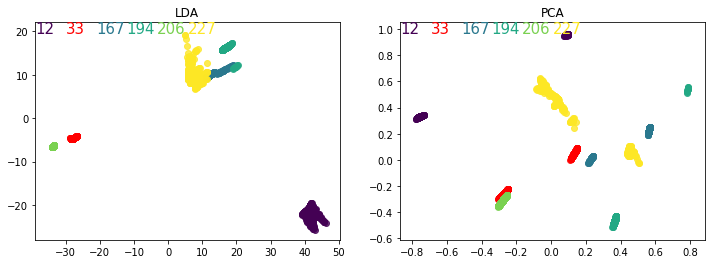

In [13]:
# Plotting LDA and PCA predictions classifying the spacegroups of the training set
fig,axes = plt.subplots(1,2, figsize=(12,4))
colors = [plt.cm.viridis((i/(n_spacegroups-1))) for i in range(n_spacegroups)]
colors[1] = 'r'

# Plotting LDA predictions
xpos=0
for label in range(n_spacegroups):
    idxs = np.array(lda_df['labels'] == spacegroups[label])
    c = colors[label]
    axes[0].scatter(lda_df.iloc[idxs,0], lda_df.iloc[idxs,1], color=c, alpha=0.8)
    axes[0].annotate(str(spacegroups[label]), xy=[xpos, 0.95], xycoords='axes fraction', color=c, size=15)
    axes[0].set_title('LDA')
    xpos += 0.1
    
# Plotting PCA predictions
xpos=0
for label in range(n_spacegroups):
    idxs = np.array(lda_df['labels'] == spacegroups[label])
    c = colors[label]
    axes[1].scatter(pca_df.iloc[idxs,0], pca_df.iloc[idxs,1], color=c, alpha=0.8)
    axes[1].annotate(str(spacegroups[label]), xy=[xpos, 0.95], xycoords='axes fraction', color=c, size=15)
    axes[1].set_title('PCA')
    xpos += 0.1

The separate clusters for spacegroups are easily observed using only 2 components LDA algorithm while PCA algorithm is not able to capture the required variance along 2 principle components. It shows that LDA performs much better than PCA for dimensinality reduction and clustering in our datasets.

#### Classification of Spacegroups using different algorithms<br>
We used LDA, KNeighbors Classifier (KNC) and Support Vector Machines (SVM) are implemented for spacegroup classification in the training dataset and the fitted models are used to predict the spacegroups in the test dataset. Performance of all the algorithm is compared based the their accuracy defined as: 

$$Accuracy=\frac{total\ correct\ predictions}{total\ correct\ predictions + total\ incorrect\ predictions}*100$$<br>


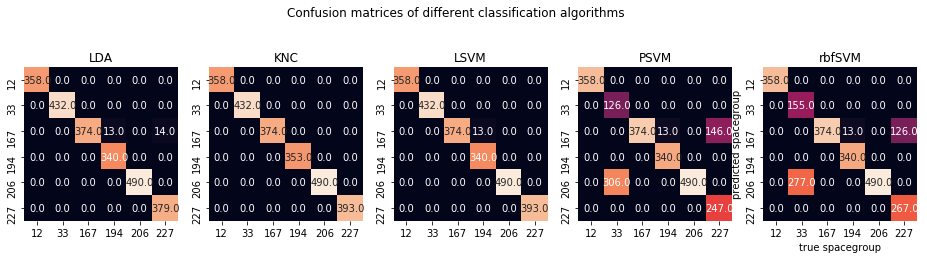

Accurancy of the LDA model in the training dataset (%):  98.875
Accurancy of KNC in the training dataset (%):  100.0
Accurancy of linear SVM in the training dataset (%):  99.45833333333334
Accurancy of polynomial SVM in the training dataset (%):  80.625
Accurancy of rbf SVM in the training dataset (%):  82.66666666666667


In [14]:
fig,axes = plt.subplots(1,5,figsize=(16,4))

cm_lda = confusion_matrix(lda_df['labels'], lda_df['labels_predicted'])   
plot_confusion_matrix(cm_lda, ax=axes[0], ticklabels=spacegroups)
axes[0].set_title('LDA')



from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC

# Applying KNC algorithm to fit training dataset for spacegroups
knc_3 = KNC(n_neighbors=3)
knc_3.fit(X_train, y_train)
y_knc = knc_3.predict(X_train)
cm_knc = confusion_matrix(y_train, y_knc)
plot_confusion_matrix(cm_knc, ax=axes[1], ticklabels=spacegroups)
axes[1].set_title('KNC')


# Applying Linear SVM algorithm to fit training dataset for spacegroups
linearSVM = SVC(kernel='linear')
linearSVM.fit(X_train, y_train)
y_lsvm = linearSVM.predict(X_train)
cm_lsvm = confusion_matrix(y_train, y_lsvm)
plot_confusion_matrix(cm_lsvm, ax=axes[2], ticklabels=spacegroups)
axes[2].set_title('LSVM')


# Applying Polynomial SVM algorithm to fit training dataset for spacegroups
polySVM = SVC(kernel='poly', degree=2)
polySVM.fit(X_train, y_train)
y_psvm = polySVM.predict(X_train)
cm_psvm = confusion_matrix(y_train, y_psvm)
plot_confusion_matrix(cm_psvm, ax=axes[3], ticklabels=spacegroups)
axes[3].set_title('PSVM')


# Applying Radial Basis Function SVM algorithm to fit training dataset for spacegroups
rbfSVM = SVC(kernel = 'rbf')
rbfSVM.fit(X_train, y_train)
y_rsvm = rbfSVM.predict(X_train)
cm_rsvm = confusion_matrix(y_train, y_rsvm)
plot_confusion_matrix(cm_rsvm, ax=axes[4], ticklabels=spacegroups)
axes[4].set_title('rbfSVM')

plt.suptitle ("Confusion matrices of different classification algorithms")
plt.show()

print('Accurancy of the LDA model in the training dataset (%): ',test_classifier_total(lda_df['labels'], lda_df['labels_predicted']))
print('Accurancy of KNC in the training dataset (%): ',test_classifier_total(y_train, y_knc))
print('Accurancy of linear SVM in the training dataset (%): ',test_classifier_total(y_train, y_lsvm))
print('Accurancy of polynomial SVM in the training dataset (%): ',test_classifier_total(y_train, y_psvm))
print('Accurancy of rbf SVM in the training dataset (%): ',test_classifier_total(y_train, y_rsvm))

Since it is hard to visualize multidimensional feature space, we plotted the first two LDA components to show the clusters classified by different algorithms: LDA, KNC, SVMs. 

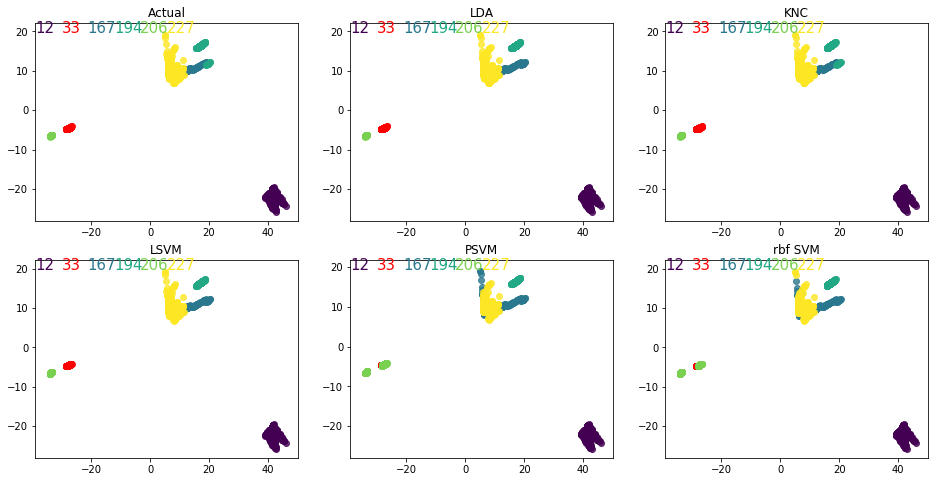

In [15]:
# Plotting spacegroups classification by different algorithms along LDA's 2 principle components 
fig,axes = plt.subplots(2,3, figsize=(16,8))
colors = [plt.cm.viridis((i/(n_spacegroups-1))) for i in range(n_spacegroups)]
colors[1] = 'r'


# Plotting Actual spacegroups
xpos=0
for label in range(n_spacegroups):
    idxs = np.array(lda_df['labels'] == spacegroups[label])
    c = colors[label]
    axes[0][0].scatter(lda_df.iloc[idxs,0], lda_df.iloc[idxs,1], color=c, alpha=0.8)
    axes[0][0].annotate(str(spacegroups[label]), xy=[xpos, 0.95], xycoords='axes fraction', color=c, size=15)
    axes[0][0].set_title('Actual')
    xpos += 0.1
    

# Plotting LDA predictions
xpos=0
for label in range(n_spacegroups):
    idxs = np.array(lda_df['labels_predicted'] == spacegroups[label])
    c = colors[label]
    axes[0][1].scatter(lda_df.iloc[idxs,0], lda_df.iloc[idxs,1], color=c, alpha=0.8)
    axes[0][1].annotate(str(spacegroups[label]), xy=[xpos, 0.95], xycoords='axes fraction', color=c, size=15)
    axes[0][1].set_title('LDA')
    xpos += 0.1
    
# Plotting KNC predictions
xpos=0
for label in range(n_spacegroups):
    idxs = np.array(y_knc == spacegroups[label])
    c = colors[label]
    axes[0][2].scatter(lda_df.iloc[idxs,0], lda_df.iloc[idxs,1], color=c, alpha=0.8)
    axes[0][2].annotate(str(spacegroups[label]), xy=[xpos, 0.95], xycoords='axes fraction', color=c, size=15)
    axes[0][2].set_title('KNC')
    xpos += 0.1
    
# Plotting LSVM predictions
xpos=0
for label in range(n_spacegroups):
    idxs = np.array(y_lsvm == spacegroups[label])
    c = colors[label]
    axes[1][0].scatter(lda_df.iloc[idxs,0], lda_df.iloc[idxs,1], color=c, alpha=0.8)
    axes[1][0].annotate(str(spacegroups[label]), xy=[xpos, 0.95], xycoords='axes fraction', color=c, size=15)
    axes[1][0].set_title('LSVM')
    xpos += 0.1
    
# Plotting PSVM predictions
xpos=0
for label in range(n_spacegroups):
    idxs = np.array(y_psvm == spacegroups[label])
    c = colors[label]
    axes[1][1].scatter(lda_df.iloc[idxs,0], lda_df.iloc[idxs,1], color=c, alpha=0.8)
    axes[1][1].annotate(str(spacegroups[label]), xy=[xpos, 0.95], xycoords='axes fraction', color=c, size=15)
    axes[1][1].set_title('PSVM')
    xpos += 0.1
    
# Plotting rbf SVM predictions
xpos=0
for label in range(n_spacegroups):
    idxs = np.array(y_rsvm == spacegroups[label])
    c = colors[label]
    axes[1][2].scatter(lda_df.iloc[idxs,0], lda_df.iloc[idxs,1], color=c, alpha=0.8)
    axes[1][2].annotate(str(spacegroups[label]), xy=[xpos, 0.95], xycoords='axes fraction', color=c, size=15)
    axes[1][2].set_title('rbf SVM')
    xpos += 0.1

#### Prediction of test dataset spacegroups using pre-fitted models

We selected top 3 performing classification algorithms to predict spacegroups of the test dataset. Such comparison would allow us to check the robustness against high variance (overfitting).

Accurancy of LDA model in test dataset predication (%):  97.66666666666667
Accurancy of KNC model in test dataset prediction (%):  100.0
Accurancy of linear SVM in the training dataset (%):  98.83333333333333


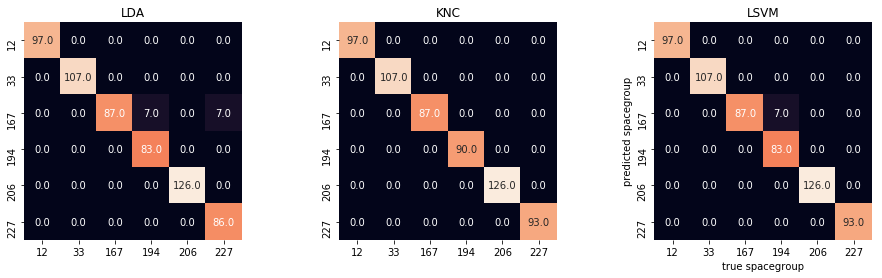

In [16]:
fig,axes = plt.subplots(1,3,figsize=(16,4))

# Importing and scaling the dataset
x_test = df_test.loc[:,['a', 'b', 'c', 'alpha', 'beta', 'gamma', 'N_total']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_test = min_max_scaler.fit_transform(x_test)
y_actual = df_test.loc[:,['spacegroup']].values

# Applying the trained LDA model for test dataset prediction
y_lda = lda_2.predict(x_scaled_test)
cm_lda = confusion_matrix(y_actual, y_lda)
plot_confusion_matrix(cm_lda, ax=axes[0], ticklabels=spacegroups)
axes[0].set_title('LDA')
print('Accurancy of LDA model in test dataset predication (%): ',test_classifier_total(y_actual, y_lda))

# Applying the trained KNC model for test dataset prediction
y_knn = knc_3.predict(x_scaled_test)
cm_knn = confusion_matrix(y_actual, y_knn)
plot_confusion_matrix(cm_knn, ax=axes[1], ticklabels=spacegroups)
axes[1].set_title('KNC')
print('Accurancy of KNC model in test dataset prediction (%): ',test_classifier_total(y_actual, y_knn))

# Applying the trained LSVM model for test dataset prediction
y_lsvm = linearSVM.predict(x_scaled_test)
cm_lsvm = confusion_matrix(y_actual, y_lsvm)
plot_confusion_matrix(cm_lsvm, ax=axes[2], ticklabels=spacegroups)
axes[2].set_title('LSVM')
print('Accurancy of linear SVM in the training dataset (%): ',test_classifier_total(y_actual, y_lsvm))

<i> The analysis above shows that <u> KNC is the best performing algorithm </u> for spacegroup classification which predicts the spacegroups of the test dataset with 100% accuracy. </i>
Additionally, the performance of all three algorithms on test dataset shows that the learners were not over-fitted.

## Step 3: Regression to predict Formation Energies and Bandgaps

We will explore different regression strategies to predict del_Hf and bandgaps. 
<br> Let us start by splitting our data into training and validation dataset and removing spacegroups from the dataset. Additionally, we will remove del_Hf and bandgaps from valdiation data.

#### Data Preparation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm

t1 = 'del_Hf'
t2 = 'bandgap'

transform_columns = ['N_total','x_Al','x_Ga','x_In','a','b','c','alpha', 'beta','gamma']
feature_columns = ['spacegroup'] + transform_columns

all = pd.concat([df_train[feature_columns], df_test])

scaler = MinMaxScaler()
scaler.fit(all[transform_columns])

df_train[transform_columns] = scaler.transform(df_train[transform_columns])
df_test[transform_columns] = scaler.transform(df_test[transform_columns])

We are choosing a 80-20 split between training and validation data.

In [18]:
random_seed=5776
X_train, X_validation = train_test_split(df_train, test_size=0.2, random_state=random_seed)

y_train = np.log1p(X_train[[t1, t2]])
X_train = X_train.drop([t1, t2], axis=1)

y_validation = np.log1p(X_validation[[t1, t2]])
X_validation = X_validation.drop([ t1, t2], axis=1)

print("The shapes of X_train and y_train are:")
print(X_train.shape, y_train.shape)
print("The shapes of X_validation and y_validation are:")
print(X_validation.shape, y_validation.shape)


The shapes of X_train and y_train are:
(1920, 11) (1920, 2)
The shapes of X_validation and y_validation are:
(480, 11) (480, 2)


#### Setting up a pipeline to test SciKit Learners

Setting up a pipeline will allow us to easily implement differnt algorithms for regression.

In [19]:
#Using KNN regressor right now, but setting up a Pipeline to test for future
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('knn', KNeighborsRegressor()),
    ])  #We can add more learners here.



Using KNN regressor, we will train a learner to predict del_Hf and bandgaps. To avoid overfitting, we will use GridSearch CV with 20-fold validation strategy. The large size of dataset precludes a higher fold validation.

In [20]:
num_cv_folds=20

#Hyperparameter tuning using inbuilt GridSeachCV
from sklearn.model_selection import GridSearchCV

hyperparameters = { 
                    'knn__n_neighbors': [2, 4, 7, 10, 12, 15]
                  }
model_knn = GridSearchCV(pipeline, hyperparameters, cv = num_cv_folds)
 
model_knn.fit(X_train, y_train)

pred = model_knn.predict(X_train)  #Using train_data right now to see how good is the performance
pred_vals = pd.DataFrame(pred)
pred_vals.columns = [t1,t2]


#### Quantifying Complexity

We are using default inverse GridCV scores for quantifying complexity. The lower the inverse score, better is the model, i.e. no overfitting.

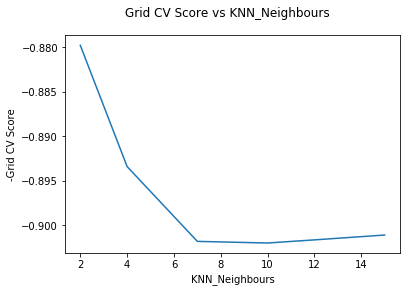

The optimum number of parameters is: {'knn__n_neighbors': 10}



In [21]:
# Plotting grid search CV score with number of parameters
plot_grid_cv_scores(model_knn,hyperparameters['knn__n_neighbors'])  
print("The optimum number of parameters is: {}".format(model_knn.best_params_))
print()   #Optimum neighbours

Parity plots can be a good visualization to analyse the performance of regressors. Below is the parity plot for training data using KNN.

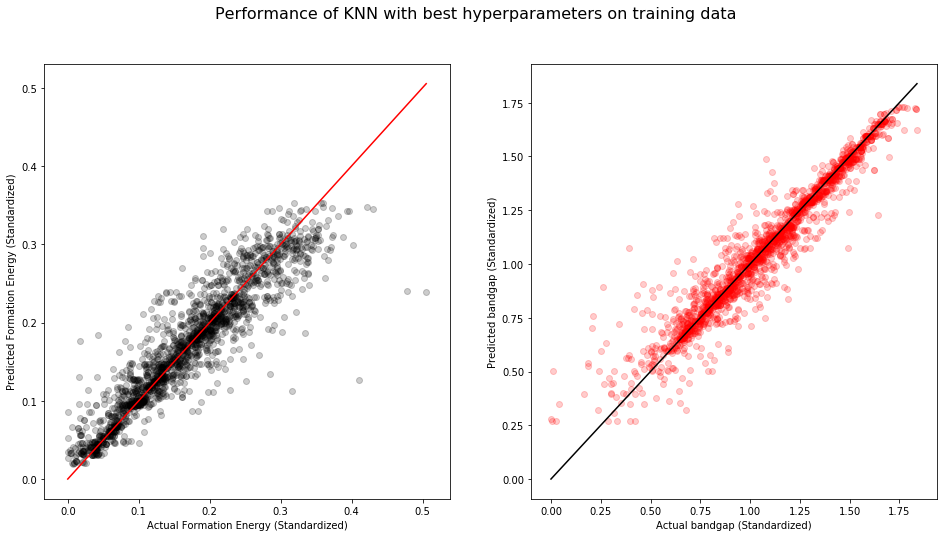

In [22]:
#Parity Plots 
fig, ax = plt.subplots(1,2,figsize=(16,8))
plt.suptitle('Performance of KNN with best hyperparameters on training data', fontsize=16)
yp=y_train['del_Hf']
ax[0].scatter(y_train['del_Hf'], pred_vals['del_Hf'], color='k', alpha=0.2)
ax[0].plot([min(yp), max(yp)], [min(yp), max(yp)], ls='-', color='r') 
ax[0].set_xlabel('Actual Formation Energy (Standardized)')
ax[0].set_ylabel('Predicted Formation Energy (Standardized)')

yp=y_train['bandgap']
ax[1].scatter(y_train['bandgap'], pred_vals['bandgap'], color='r', alpha=0.2)
ax[1].plot([min(yp), max(yp)], [min(yp), max(yp)], ls='-', color='k') 
ax[1].set_xlabel('Actual bandgap (Standardized)')
ax[1].set_ylabel('Predicted bandgap (Standardized)')
plt.show()

Similar plot is seen for validation dataset.

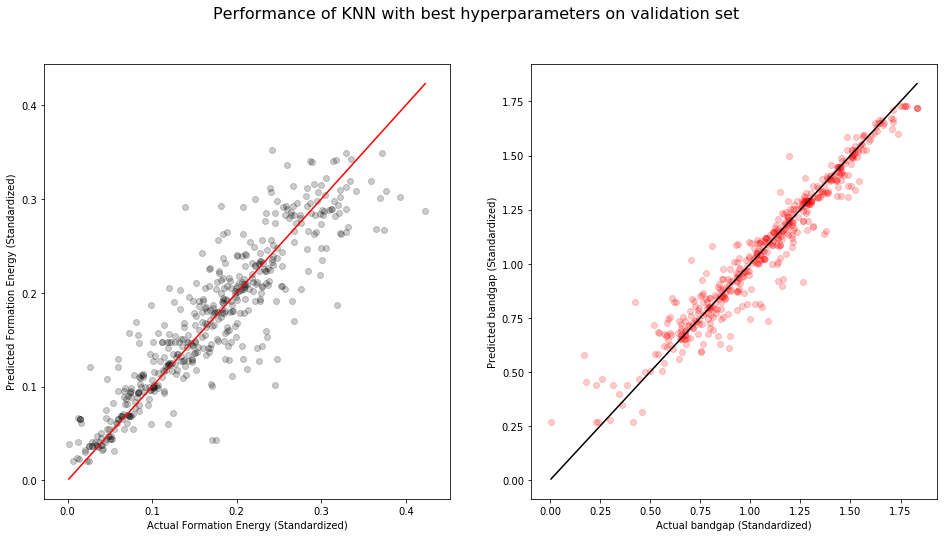

In [23]:
pred_validation = model_knn.predict(X_validation)  #Using train_data right now to see how good is the performance
pred_vals_validation = pd.DataFrame(pred_validation)
pred_vals_validation.columns = [t1,t2]

#Parity Plots 
fig, ax = plt.subplots(1,2,figsize=(16,8))
plt.suptitle('Performance of KNN with best hyperparameters on validation set', fontsize=16)
yp=y_validation['del_Hf']
ax[0].scatter(y_validation['del_Hf'], pred_vals_validation['del_Hf'], color='k', alpha=0.2)
ax[0].plot([min(yp), max(yp)], [min(yp), max(yp)], ls='-', color='r')
ax[0].set_xlabel('Actual Formation Energy (Standardized)')
ax[0].set_ylabel('Predicted Formation Energy (Standardized)')

yp=y_validation['bandgap']
ax[1].scatter(y_validation['bandgap'], pred_vals_validation['bandgap'], color='r', alpha=0.2)
ax[1].plot([min(yp), max(yp)], [min(yp), max(yp)], ls='-', color='k') 
ax[1].set_xlabel('Actual bandgap (Standardized)')
ax[1].set_ylabel('Predicted bandgap (Standardized)')
plt.show()

### Quantifying Error

Since we are dealing with a regression problem, error metrics need to be defined to assess the algorithm performance. Here, we will use R<sup>2</sup> and standard error. Here we will write functions to calculate these quantitites. 

In [24]:
#Quantifying error in regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error  # r2 score, mean_squared_log_error, mean_absolute_error

The defined functions are used to see the performance of KNN regressor.

In [25]:
print('Performance metrics of del_Hf predictions using KNN\n')
print("Training data:   ",performance_metrics(model_knn,X_train.values,y_train.values, type_=0))
print("Validation data: ",performance_metrics(model_knn,X_validation.values,y_validation.values, type_=0))
print('\nPerformance metrics of bandgap predictions using KNN\n')
print("Training data:   ",performance_metrics(model_knn,X_train.values,y_train.values, type_=1))
print("Validation data: ",performance_metrics(model_knn,X_validation.values,y_validation.values, type_=1))

Performance metrics of del_Hf predictions using KNN

Training data:    (0.8566502658580482, 0.02152531154315087)
Validation data:  (0.8115696887556626, 0.025688795657283738)

Performance metrics of bandgap predictions using KNN

Training data:    (0.9265027962735328, 0.05302896027143726)
Validation data:  (0.9340615969121869, 0.055541571279523125)


<i> KNN seems to work better for bandgap predictions. The equivalent performance on validation data is a proof that the regressor was without high variance. This was further expected since it was trained using optimum complexity via CV score. </i>

#### Analysing other regressors

As a part of this project, we are also using other learners viz. linear, polynomial and random forest regressors (RFR). Their model objects are declared below. Additionally, RFR regressor is optimized using GridSearch CV to prevent overfitting.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

#Linear
model_linear     = Pipeline([('linear', LinearRegression(fit_intercept=True))])
model_linear.fit(X_train,y_train)
#2nd order poly
model_polyr_two  = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
model_polyr_two.fit(X_train,y_train)
#3rd order poly
model_polyr_three= Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
model_polyr_three.fit(X_train,y_train)
#RFR
pipeline_rfr         = Pipeline([('rfr', RandomForestRegressor()),])  #We can add more learners here.
hyperparameters_rfr  = {'rfr__min_samples_leaf':[2,4,6],'rfr__min_samples_split': [4,8,12],'rfr__n_estimators': [400]}
model_rfr        = GridSearchCV(pipeline_rfr, hyperparameters_rfr)
model_rfr.fit(X_train, y_train)
print("The optimum number of parameters is: {}".format(model_rfr.best_params_))


The optimum number of parameters is: {'rfr__min_samples_leaf': 4, 'rfr__min_samples_split': 8, 'rfr__n_estimators': 400}


The performance metrics of each algorithm on training and valdiation data is evaluated below. Firstly, performance in predicting del_Hf is shown.

In [27]:
model_list=[model_knn,model_linear,model_polyr_two,model_polyr_three,model_rfr]
model_list_str = ['KNN', 'Linear', 'Poly_two', 'Poly_three', 'RFR']
columns_str = ['R2_train','Std_Err_train',  'R2_validation','Std_Err_validation']
columns_str2 = ['R2_train', 'R2_validation','Std_Err_train', 'Std_Err_validation']

del_Hf_performance = []
bandgap_performance = []
for model in model_list:
    del_Hf_local = [x for x in performance_metrics(model,X_train.values,y_train.values, type_=0)] \
    + [x for x in performance_metrics(model,X_validation.values,y_validation.values, type_=0)]
    del_Hf_performance.append(del_Hf_local)    
    
    bandgap_local = [x for x in performance_metrics(model,X_train.values,y_train.values, type_=1)] \
    + [x for x in performance_metrics(model,X_validation.values,y_validation.values, type_=1)]
    bandgap_performance.append(bandgap_local)

performance_df=pd.DataFrame(index=model_list_str, data=del_Hf_performance,columns=columns_str)
performance_df.reindex(columns=columns_str2)
performance_df.sort_values(by=['R2_validation'],ascending=False)

R2_train  Std_Err_train  R2_validation  Std_Err_validation
RFR         0.896603       0.018246       0.853573            0.022817
KNN         0.856650       0.021525       0.811570            0.025689
Poly_two    0.850170       0.022284       0.795044            0.025223
Linear      0.409061       0.051644       0.335729            0.055277
Poly_three  0.882445       0.019911     -33.535351            0.054162

None of the learners is able to predict del_Hf with very high accuracy. Within the learners, Poly_three and poly_two show signs of overfitting due to their difference in R<sup>2</sup> scores between training and validation data. Additionally, for future work better features may be explored for del_Hf predictions.

The performance metrics for bandgap predictions are shown next.

In [28]:
performance_bg_df=pd.DataFrame(index=model_list_str, data=bandgap_performance,columns=columns_str)
performance_bg_df.reindex(columns=columns_str2)
performance_bg_df.sort_values(by=['R2_validation'],ascending=False)

R2_train  Std_Err_train  R2_validation  Std_Err_validation
Poly_two    0.936027       0.049632       0.946667            0.049680
KNN         0.926503       0.053029       0.934062            0.055542
RFR         0.960420       0.038246       0.928724            0.055025
Linear      0.809809       0.100141       0.833471            0.102658
Poly_three  0.938150       0.053225      -3.309813            0.116501

Poly_two, KNN and RFR seem to present equivalent performances. However, with multiple runs with different random states, RFR tends to perform better. Additionally, RFR performance on training data is the best amongst all considered algorithms.

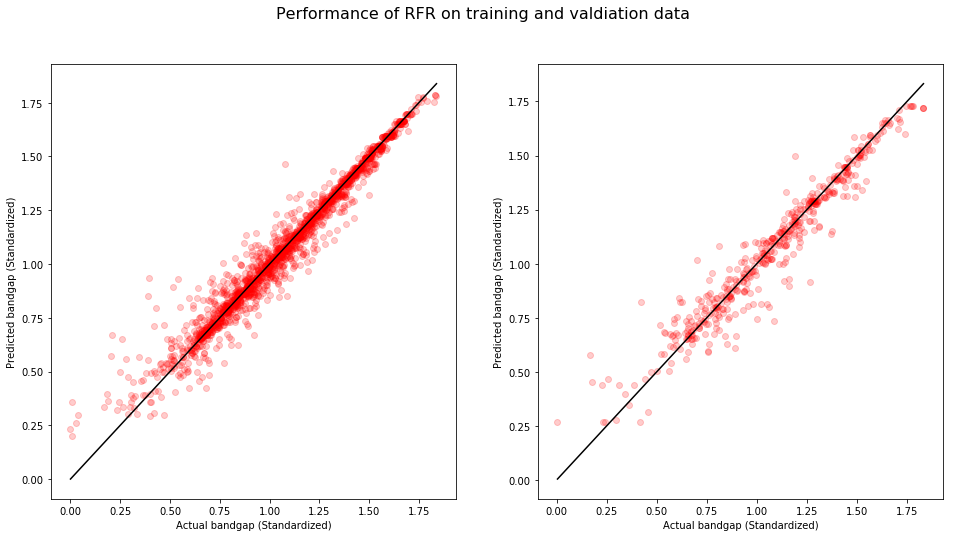

In [29]:
model_best=model_rfr
pred = model_best.predict(X_train)  #Using train_data right now to see how good is the performance
pred_vals = pd.DataFrame(pred)
pred_vals.columns = [t1,t2]



#Parity Plots 
fig, ax = plt.subplots(1,2,figsize=(16,8))
plt.suptitle('Performance of RFR on training and valdiation data', fontsize=16)
yp=y_train['bandgap']
ax[0].scatter(y_train['bandgap'], pred_vals['bandgap'], color='r', alpha=0.2)
ax[0].plot([min(yp), max(yp)], [min(yp), max(yp)], ls='-', color='k') 
ax[0].set_xlabel('Actual bandgap (Standardized)')
ax[0].set_ylabel('Predicted bandgap (Standardized)')

yp=y_validation['bandgap']
ax[1].scatter(y_validation['bandgap'], pred_vals_validation['bandgap'], color='r', alpha=0.2)
ax[1].plot([min(yp), max(yp)], [min(yp), max(yp)], ls='-', color='k') 
ax[1].set_xlabel('Actual bandgap (Standardized)')
ax[1].set_ylabel('Predicted bandgap (Standardized)')
plt.show()

Parity plots for bandgap prediction using RFR learner show good results.

Better features and learners, or the use of ensemble learning could help improve the results for del_Hf prediction.

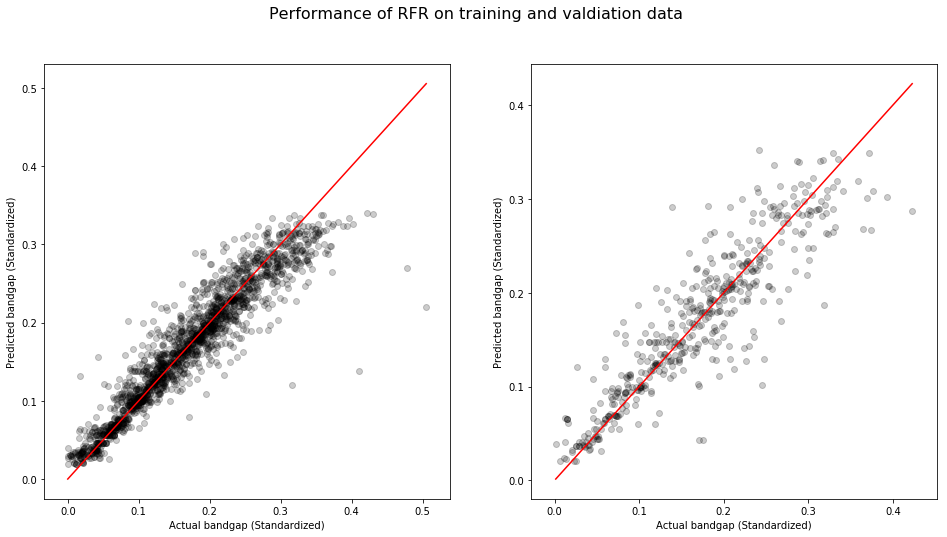

In [30]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
plt.suptitle('Performance of RFR on training and valdiation data', fontsize=16)
yp=y_train['del_Hf']
ax[0].scatter(y_train['del_Hf'], pred_vals['del_Hf'], color='k', alpha=0.2)
ax[0].plot([min(yp), max(yp)], [min(yp), max(yp)], ls='-', color='r') 
ax[0].set_xlabel('Actual bandgap (Standardized)')
ax[0].set_ylabel('Predicted bandgap (Standardized)')

yp=y_validation['del_Hf']
ax[1].scatter(y_validation['del_Hf'], pred_vals_validation['del_Hf'], color='k', alpha=0.2)
ax[1].plot([min(yp), max(yp)], [min(yp), max(yp)], ls='-', color='r')
ax[1].set_xlabel('Actual bandgap (Standardized)')
ax[1].set_ylabel('Predicted bandgap (Standardized)')
plt.show()

### Conclusions
In this project, we worked on the transparent conductors database. Two primary objectives were, 1) classification of transparent conductors into their spacegroups, and 2) predicting their formation energies (del_Hf) and bandgaps. The training dataset consisted of 2400 transparent conductors and their structural parameters. These parameters were used as features for classification and regression for predictions in test dataset of 600 conductors. <br>

For classification, we used LDA, KNC and SVMs learners. KNC performed the best classifying spacegroups in both training and test datasets with 100% accuracy. For regression, we used KNN, Linear, Polynomial (deg=2 and 3) and Random Forest (RFR) learners. RFR, KNN and 2-deg polynomial learners performed well for bandgap predictions with R<sup>2</sup> values greater than 0.92 for validation dataset. For formation energies prediction, RFR gave the best performance with R<sup>2</sup> value 0.85 for validation dataset. For future work, new features may be explored for formation energies prediction. 

### References

1. T. Mueller, A.G. Kusne, and R. Ramprasad, <i>Rev. in Comp. Chem.</i>, 29 (2016).

2. R. LeSar, <i>Stat. Anal. Data Min.</i>, 1, 372 (2009). 

3. C. J. Long, J. Hattrick‐Simpers, M. Murakami, R. C. Srivastava, I. Takeuchi, V. L. Karen, and X. Li, <i>Rev. Sci. Instrum.</i>, 78, 072217 (2007). 

4. G. Hautier, C. C. Fischer, A. Jain, T. Mueller, and G. Ceder,<i> Chem. Mater.</i>, 22, 3762 (2010).

5. D. Morgan, S. Curtarolo, K. Persson, J. Rodgers, and G. Ceder, <i>Phys. Rev. Lett.</i>, 91, 135503 (2003). 

6. G. Pilania, C. Wang, X. Jiang, S. Rajasekaran, and R. Ramprasad, <i>Sci. Rep.</i>, 3, 1 (2013).

7. K. Hansen, G. Montavon, F. Biegler, S. Fazli, M. Rupp, M. Scheffler, O. A. von Lilienfeld, A. Tkatchenko, and K.‐R. Müller,<i> J. Chem. Theory Comput.</i>, 9, 3404 (2013). 

8. V. Botu and R. Ramprasad, <i>Int. J. Quantum Chem.</i>, 115, 1074 (2015). 

9. From Wikipedia, url: https://en.wikipedia.org/wiki/Transparent_conducting_film (Last accessed: February 15, 2018)

10. <i>Introduction to Solid State Physics 8th Edition</i>,  Kittel C. (2005), John Wiley and Sons

